In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

### Check for the mean % for the null values 

In [4]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

## We can't perform the random imputation with sk learn but we can do it using Pandas
- For this, we first need to create the seperate columns for it 

In [5]:
df['Age_Imputed'] = df['Age']

In [6]:
df.head()

,Survived,Age,Fare,Age_Imputed
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [7]:
df['Age'][df['Age'].isnull()]

5     NaN
17    NaN
19    NaN
26    NaN
28    NaN
       ..
859   NaN
863   NaN
868   NaN
878   NaN
888   NaN
Name: Age, Length: 177, dtype: float64

In [8]:
df['Age_Imputed'][df['Age_Imputed'].isnull()]=df['Age'].dropna().sample(df['Age'].isnull().sum()).values

C:\Users\seher\AppData\Local\Temp\ipykernel_2604\3797000036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_Imputed'][df['Age_Imputed'].isnull()]=df['Age'].dropna().sample(df['Age'].isnull().sum()).values


### Look here all the values are got replaced with some random data that actually belongs to the age column

In [9]:
df.isnull().sum()

Survived         0
Age            177
Fare             0
Age_Imputed      0
dtype: int64

### Here at 888, we have null in Age column but in case of Age_Imputed it's got changed with 5

In [10]:
df.tail()

,Survived,Age,Fare,Age_Imputed
886,0,27.0,13.00,27.0
887,1,19.0,30.00,19.0
888,0,NaN,23.45,44.0
889,1,26.0,30.00,26.0
890,0,32.0,7.75,32.0


### Now let's check the distribution 

C:\Users\seher\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\seher\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


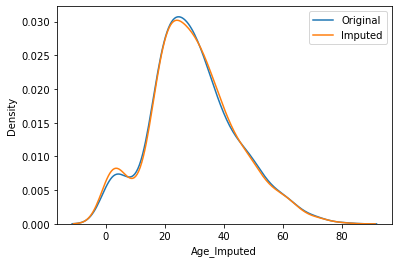

In [11]:
sns.distplot(df['Age'],label='Original',hist=False)
sns.distplot(df['Age_Imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

## Here we can see that the distribution remain same but it's only suitable for linear model not for tree based model

#### Issues:
- Co-variance get changed
- In order to deal with null values after the deployment, we need to put the copy of that data column on the cloud to fill out the value 
- but for the same input, we may get different prediction bcz it get replace with the random value in case of null values 

### Check the cov, but it didn't change much 
- check the co-var of Age and Age-Imputed with other columns 

In [12]:
df.cov()

,Survived,Age,Fare,Age_Imputed
Survived,0.236772,-0.551296,6.221787,-0.506289
Age,-0.551296,211.019125,73.849030,211.019125
Fare,6.221787,73.849030,2469.436846,61.731283
Age_Imputed,-0.506289,211.019125,61.731283,213.422227


### The outliers are also not get much effected using this technique

<AxesSubplot:>

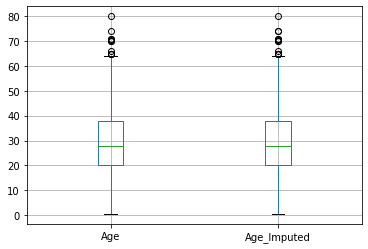

In [13]:
df[['Age', 'Age_Imputed']].boxplot()

In [ ]:
sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))

In [ ]:
df['Age'].dropna().sample(1,random_state=int())